<a href="https://colab.research.google.com/github/danamyergaliyeva/NLP/blob/master/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re, string 
import pandas as pd 
from time import time  
from collections import defaultdict
from matplotlib import pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import spacy
import nltk
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
%matplotlib inline

In [0]:
df = pd.read_csv('BBC news dataset.csv')
df = df.drop(columns="tags")
df = df.drop(columns="Unnamed: 0")

In [0]:
df.head()

,description
0,chelsea sack mutu chelsea have sacked adrian ...
1,record fails to lift lacklustre meet yelena i...
2,edu describes tunnel fracas arsenals edu has ...
3,ogara revels in ireland victory ireland flyha...
4,unclear future for striker baros liverpool fo...


In [0]:
print(STOPWORDS)

{'you', 'between', 'don', 'an', "didn't", 'yours', "shan't", "won't", 'have', 'why', 'or', 'yourself', 'be', "isn't", 'nor', 'a', 'ourselves', 'out', "wasn't", 'than', 'as', 'couldn', 'for', 'aren', 'will', 'in', 'hasn', 'up', 'such', 'weren', 'did', 'she', 'because', 'into', 'further', "haven't", 'until', "weren't", 'i', "it's", "doesn't", 'so', 'of', 'having', 'he', 'once', 'has', 'about', 'during', 'very', 'didn', 'if', 'too', 'll', 'own', 'should', 'the', 'not', 'on', 'me', 'over', 'mightn', 'myself', 'it', 'o', 'y', 'we', "aren't", 's', 'few', 'there', 'only', "you're", 'doing', "you'll", 'same', 'were', 'all', 't', "that'll", "you'd", 'does', 'more', 'doesn', 'their', "needn't", 'his', 'ma', 'themselves', 'through', 'hers', 'wouldn', 'and', 'down', 'herself', 'here', 'below', 'them', 'but', 'had', 'wasn', 'haven', 'm', 'mustn', "hasn't", 've', "mustn't", 'other', 'any', 'our', "couldn't", "wouldn't", 'him', 'ours', 'again', 'this', 'some', "don't", "she's", 'was', 'itself', 'afte

In [0]:
def clean_data(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    # Remove a sentence if it is only one word long
    if len(text) > 2:
        return ' '.join(word for word in text.split() if word not in STOPWORDS)

df_clean = pd.DataFrame(df.description.apply(lambda x: clean_data(x)))

In [0]:
df_clean.head()

,description
0,chelsea sack mutu chelsea sacked adrian mutu f...
1,record fails lift lacklustre meet yelena isinb...
2,edu describes tunnel fracas arsenals edu lifte...
3,ogara revels ireland victory ireland flyhalf r...
4,unclear future striker baros liverpool forward...


In [0]:
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

df_clean["text_lemmatize"] =  df_clean.apply(lambda x: lemmatizer(x['description']), axis=1)

In [0]:
df_clean.head()

,description,text_lemmatize
0,chelsea sack mutu chelsea sacked adrian mutu f...,chelsea sack mutu chelsea sack adrian mutu fai...
1,record fails lift lacklustre meet yelena isinb...,record fail lift lacklustre meet yelena isinba...
2,edu describes tunnel fracas arsenals edu lifte...,edu describe tunnel fracas arsenal edu lift li...
3,ogara revels ireland victory ireland flyhalf r...,ogara revel ireland victory ireland flyhalf ro...
4,unclear future striker baros liverpool forward...,unclear future striker baros liverpool forward...


In [0]:
df_clean['text_lemmatize_clean'] = df_clean['text_lemmatize'].str.replace('-PRON-', '')

In [0]:

sentences = [row.split() for row in df_clean['text_lemmatize_clean']]
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

25118

In [0]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['say', 'mr', 'year', 'would', 'make', 'people', 'also', 'new', 'one', 'take']

In [0]:
w2v_model = Word2Vec(min_count=200,
                     window=5,
                     size=100,
                     workers=4)

In [0]:
w2v_model.build_vocab(sentences)

In [0]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_model.iter)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """Entry point for launching an IPython kernel.


(1157035, 2655285)

In [0]:
w2v_model.init_sims(replace=True)

In [0]:
w2v_model.wv.most_similar(positive=['growth'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('rate', 0.9466197490692139),
 ('economy', 0.9465557336807251),
 ('low', 0.9433482885360718),
 ('rise', 0.9292025566101074),
 ('price', 0.9094661474227905),
 ('remain', 0.901011049747467),
 ('figure', 0.900577187538147),
 ('strong', 0.8980664014816284),
 ('likely', 0.896213173866272),
 ('predict', 0.892868161201477)]

In [0]:
w2v_model.wv.most_similar(positive=['statement'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('spokesman', 0.9313952922821045),
 ('police', 0.8993589878082275),
 ('chairman', 0.8844578862190247),
 ('comment', 0.8640029430389404),
 ('common', 0.8596587777137756),
 ('issue', 0.8587344884872437),
 ('bill', 0.8560528755187988),
 ('case', 0.8509966731071472),
 ('lord', 0.8505951166152954),
 ('foreign', 0.8395270109176636)]

In [0]:
w2v_model.wv.similarity('growth', 'economy')


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.94655573

In [0]:
def tsne_plot(model, wordSearch):
    labels = []
    tokens = []
    
    tokens.append(model[wordSearch])
    labels.append(wordSearch)

    for word, value in model.wv.most_similar(positive=[wordSearch]):
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10, 10))
    plt.scatter(x[0],y[0], c='#ff0000')
    plt.annotate(labels[0],
                     xy=(x[0], y[0]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    for i in range(1, len(x)):
        plt.scatter(x[i],y[i], c='#000000')
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [0]:

w2v_model.wv.vocab

{'able': <gensim.models.keyedvectors.Vocab at 0x7fca61fd8e80>,
 'access': <gensim.models.keyedvectors.Vocab at 0x7fca61fea2e8>,
 'accord': <gensim.models.keyedvectors.Vocab at 0x7fca61fe2dd8>,
 'account': <gensim.models.keyedvectors.Vocab at 0x7fca61fe66d8>,
 'across': <gensim.models.keyedvectors.Vocab at 0x7fca61fe6518>,
 'act': <gensim.models.keyedvectors.Vocab at 0x7fca61fd64e0>,
 'action': <gensim.models.keyedvectors.Vocab at 0x7fca6204ff28>,
 'actor': <gensim.models.keyedvectors.Vocab at 0x7fca61fea780>,
 'add': <gensim.models.keyedvectors.Vocab at 0x7fca6204fb38>,
 'age': <gensim.models.keyedvectors.Vocab at 0x7fca61fdff60>,
 'ago': <gensim.models.keyedvectors.Vocab at 0x7fca61fdbfd0>,
 'agree': <gensim.models.keyedvectors.Vocab at 0x7fca61fdb2e8>,
 'ahead': <gensim.models.keyedvectors.Vocab at 0x7fca61fdb518>,
 'aid': <gensim.models.keyedvectors.Vocab at 0x7fca61fe6d30>,
 'aim': <gensim.models.keyedvectors.Vocab at 0x7fca61fe2eb8>,
 'album': <gensim.models.keyedvectors.Vocab at 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


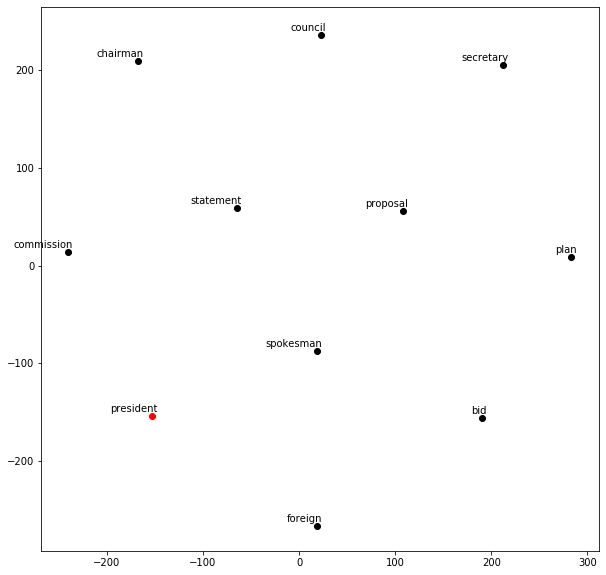

In [0]:
tsne_plot(w2v_model, 'president')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


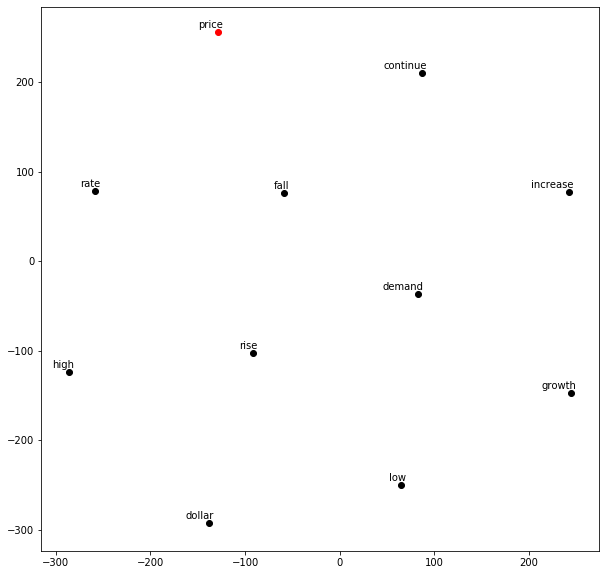

In [0]:
tsne_plot(w2v_model, 'price')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


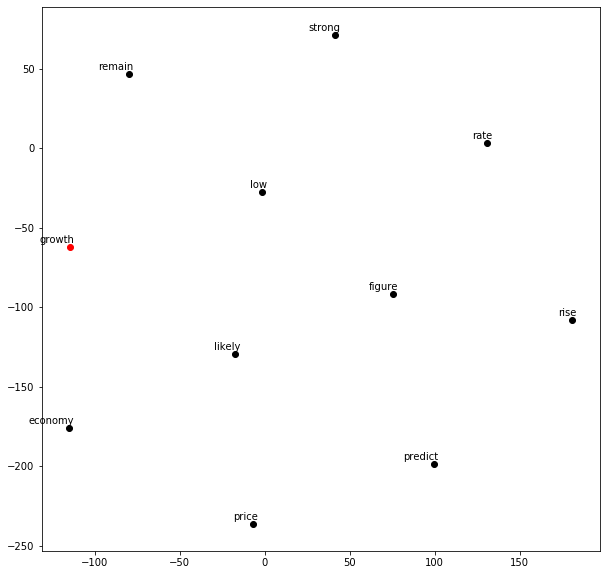

In [0]:
tsne_plot(w2v_model, 'growth')